In [15]:
import pandas as pd

# Load the CSV file into a DataFrame
books = pd.read_csv(f'books.csv')
books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

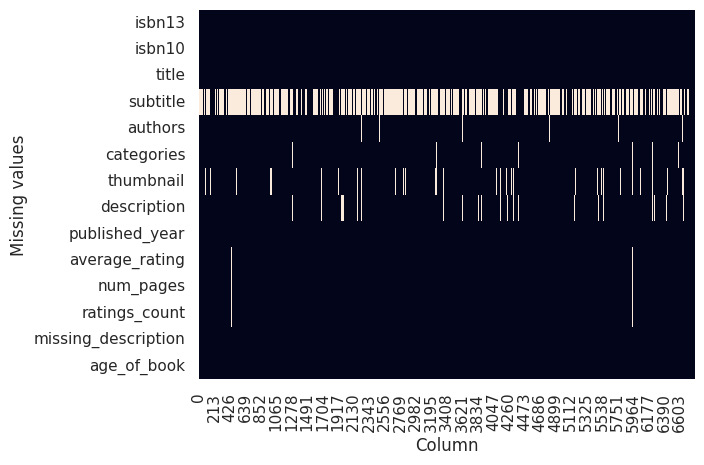

In [64]:
_, ax = plt.subplots()
sns.heatmap(books.isna().transpose(), cbar=False, ax=ax)

plt.xlabel('Column')
plt.ylabel('Missing values')

plt.show()

### Before moving na values of some columns, checking the correlation of them to see if they are related to make sure the rest of the data still represents cases

In [30]:
import numpy as np

In [33]:
books['missing_description'] = np.where(books['description'].isna(), 1, 0)
books['age_of_book'] = 2025 - books['published_year']

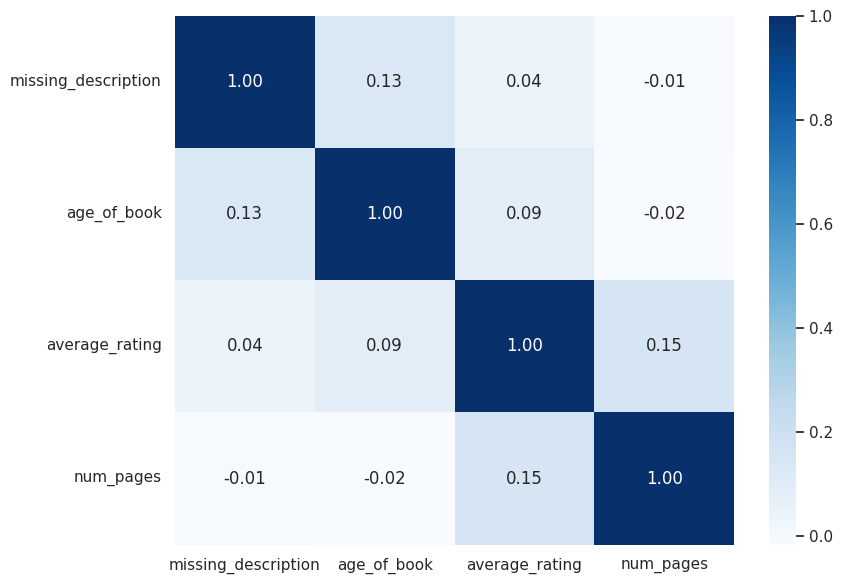

In [55]:
columns_of_interest = ['missing_description', 'age_of_book', 'average_rating', 'num_pages']

# use spearman for monotinic relationship (not necessarily straight-line)
# and missing_description is not continuous
correlation_matrix = books[columns_of_interest].corr(method="spearman")

sns.set_theme(style='white')
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='Blues', ax=ax)

plt.tight_layout()
plt.show()

### As shown in the above heat map, missing_description and other interesting columns are not correlated

In [65]:
book_missing = books[~(books['description'].isna()) &
                     ~(books['published_year'].isna()) &
                     ~(books['average_rating'].isna()) &
                     ~(books['num_pages'].isna())]

In [66]:
book_missing.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0


## categories column

In [86]:
book_missing['categories'].nunique()

531

In [79]:
categories_count = book_missing['categories'].value_counts().reset_index().sort_values("count", ascending=False)

<Axes: xlabel='count', ylabel='categories'>

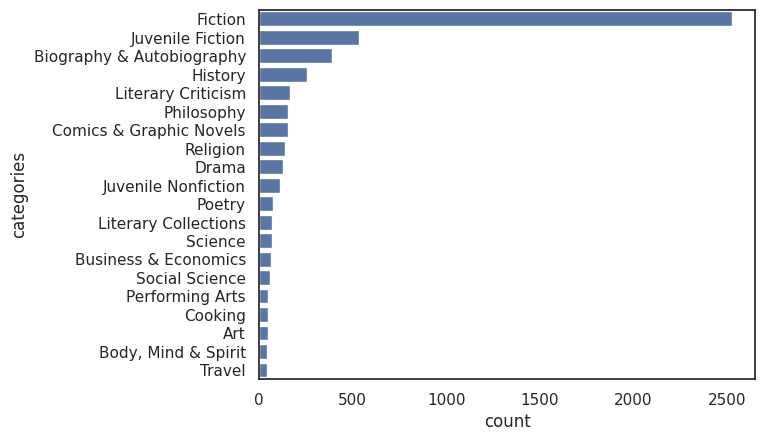

In [85]:
sns.barplot(data=categories_count.head(20), x='count', y='categories')

## description length

In [92]:
book_missing.loc["words_in_description"] = book_missing["description"].str.split().str.len()
book_missing["words_in_description"].describe()

count    6507.000000
mean       66.325803
std        66.120291
min         1.000000
25%        27.000000
50%        40.000000
75%        82.000000
max       920.000000
Name: words_in_description, dtype: float64

(0.0, 500.0)

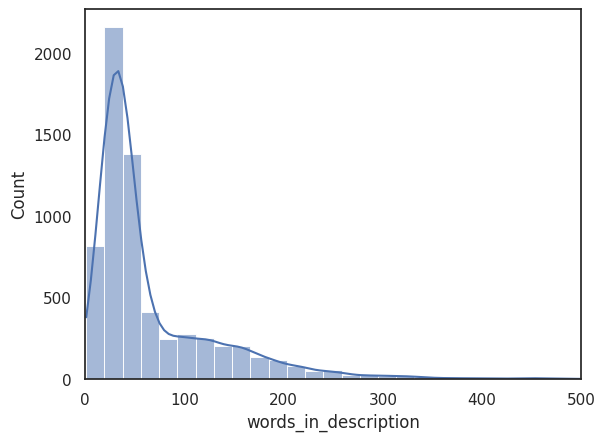

In [111]:
sns.histplot(book_missing["words_in_description"], bins=50, kde=True)
plt.xlim(0, 500)

In [114]:
book_missing.loc[book_missing['words_in_description'].between(1, 4), 'description']

6                                           Donation.
11                                     Fantasy-roman.
748              Includes bibliographical references.
770                             Bound For Oregon (PB)
775                                No Marketing Blurb
812                                No Marketing Blurb
857                          First published in 1813.
944                         Edited by Maurice Hindle.
953                        DEFOE/ROBINSON CRUSOE (BC)
954                             Edited by John Carey.
962                         ALLEN/GETTING THINGS DONE
1054                            GILBERT/EAT PRAY LOVE
1056    "Graham Greene centennial, 1904-2004"--Cover.
1060                   STEINBECK/GRAPES OF WRATH (BC)
1346                                   Fantasy-roman.
1546                                      Winter 2003
1610                                      Winter 1999
1813                             National bestseller.
1981                        

In [115]:
book_missing.loc[book_missing['words_in_description'].between(5, 14), 'description']

2       Volume Two of Stephen Donaldson's acclaimed se...
38      Koko is Peter Straub's foray into the psycholo...
70      A matter of life and death - and the Throne of...
77                         Nonsense rhyming story. 4 yrs+
84      A study guide for the novel There's a Boy in t...
                              ...                        
6715    The first comprehensive guide to addressing Na...
6726       Presents two complete novels from Henry James.
6757                          Audio Book- unabriged on CD
6776    Raymond Chandler meets The Exorcist. Classic n...
6795    Book Of Five Rings is a Kodansha International...
Name: description, Length: 308, dtype: object

### Follow the guts to cap the number of words in decription needed to be meaningful

In [117]:
book_missing_25_words = book_missing[book_missing["words_in_description"] >= 25]
book_missing_25_words.shape

(5197, 15)

## title and subtitle columns

In [137]:
book_missing_25_words.loc[:, 'title_and_subtitle'] = (
    np.where(book_missing_25_words['subtitle'].isna(), book_missing_25_words['title'],
             book_missing_25_words[['title', 'subtitle']].astype(str).agg(': '.join, axis=1))
)

In [138]:
book_missing_25_words.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle
0,9.780002e+12,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0.0,21.0,199.0,Gilead
1,9.780002e+12,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0.0,25.0,205.0,Spider's Web: A Novel
3,9.780006e+12,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0.0,32.0,57.0,Rage of angels
4,9.780006e+12,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0.0,23.0,45.0,The Four Loves
5,9.780006e+12,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0.0,23.0,75.0,The Problem of Pain


## isb13 and description columns

In [141]:
book_missing_25_words.loc[:, "tagged_description"] = book_missing_25_words[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)

In [142]:
book_missing_25_words.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle,tagged_description
0,9.780002e+12,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0.0,21.0,199.0,Gilead,9780002005883.0 A NOVEL THAT READERS and criti...
1,9.780002e+12,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0.0,25.0,205.0,Spider's Web: A Novel,9780002261982.0 A new 'Christie for Christmas'...
3,9.780006e+12,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0.0,32.0,57.0,Rage of angels,"9780006178736.0 A memorable, mesmerizing heroi..."
4,9.780006e+12,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0.0,23.0,45.0,The Four Loves,9780006280897.0 Lewis' work on the nature of l...
5,9.780006e+12,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0.0,23.0,75.0,The Problem of Pain,"9780006280934.0 ""In The Problem of Pain, C.S. ..."


## Save clean data

In [143]:
book_missing_25_words\
.drop(['subtitle', 'missing_description', 'age_of_book', 'words_in_description'], axis=1)\
.to_csv('books_cleaned.csv', index=False)